In [ ]:
# !unzip /content/drive/MyDrive/AI4VNChallenge2022/dataset/public_test.zip

In [ ]:
# !git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 38751, done.
remote: Counting objects: 100% (727/727), done.
remote: Compressing objects: 100% (379/379), done.
remote: Total 38751 (delta 437), reused 592 (delta 348), pack-reused 38024
Receiving objects: 100% (38751/38751), 320.56 MiB | 14.79 MiB/s, done.
Resolving deltas: 100% (26958/26958), done.
Checking out files: 100% (1279/1279), done.


### Download pre-train model 

In [ ]:
# !wget https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/det_r50_vd_sast_icdar15_v2.0_train.tar -P ./pretrain_models
# !tar -xf ./pretrain_models/det_r50_vd_sast_icdar15_v2.0_train.tar -C /content/drive/MyDrive/AI4VNChallenge2022/pretrain_models

--2022-07-20 06:49:23--  https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/det_r50_vd_sast_icdar15_v2.0_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1041520640 (993M) [application/x-tar]
Saving to: ‘./pretrain_models/det_r50_vd_sast_icdar15_v2.0_train.tar’

det_r50_vd_sast_icd 100%[===================>] 993.27M  15.5MB/s    in 82s     

2022-07-20 06:50:47 (12.2 MB/s) - ‘./pretrain_models/det_r50_vd_sast_icdar15_v2.0_train.tar’ saved [1041520640/1041520640]



In [ ]:
# !wget https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_slim_distill_train.tar -P ./pretrain_models
# !tar -xf ./pretrain_models/Multilingual_PP-OCRv3_det_slim_distill_train.tar -C /content/drive/MyDrive/AI4VNChallenge2022/pretrain_models

--2022-07-22 07:35:37--  https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_slim_distill_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 220.181.33.44, 220.181.33.43, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|220.181.33.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139933184 (133M) [application/x-tar]
Saving to: ‘./pretrain_models/Multilingual_PP-OCRv3_det_slim_distill_train.tar’

Multilingual_PP-OCR 100%[===================>] 133.45M  24.4MB/s    in 13s     

2022-07-22 07:35:50 (10.6 MB/s) - ‘./pretrain_models/Multilingual_PP-OCRv3_det_slim_distill_train.tar’ saved [139933184/139933184]



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install thư viện cần thiết 

In [2]:
%cd /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/

/content/drive/.shortcut-targets-by-id/1C9ftFos7-sXSqT9nzoRhFOPnfHJcMoD-/AI4VNChallenge2022/PaddleOCR


In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 604 kB 7.9 MB/s 
     |████████████████████████████████| 2.8 MB 82.4 MB/s 
     |████████████████████████████████| 2.0 MB 55.4 MB/s 
     |████████████████████████████████| 55.7 MB 1.8 MB/s 
     |████████████████████████████████| 204 kB 96.7 MB/s 
     |████████████████████████████████| 104 kB 98.4 MB/s 
     |████████████████████████████████| 399 kB 63.1 MB/s 
     |████████████████████████████████| 2.3 MB 42.9 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.6.0.66
    Uninstalling opencv-contrib-python-4.6.0.66:
      Successfully uninstalled opencv-contrib-python-4.6.0.66


In [4]:
!pip install paddlepaddle-gpu 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 393.8 MB 22 kB/s 
     |████████████████████████████████| 394 kB 76.8 MB/s 


In [5]:
!pip install PyYAML==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 7.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Xử lý input data

Detection using SAST 

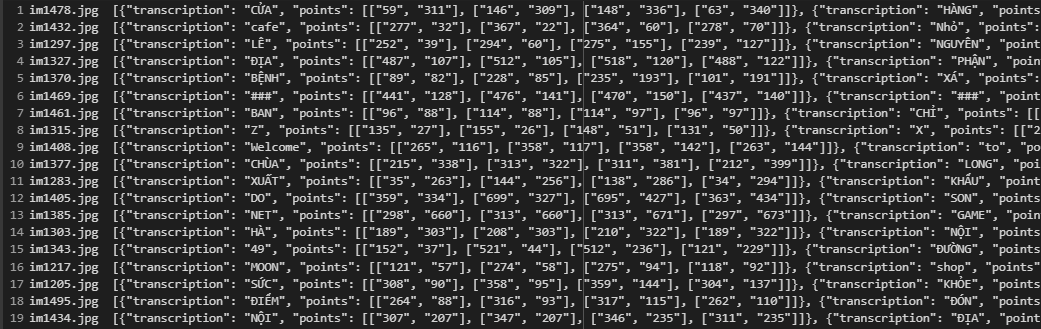

### Split data -> train test val

In [ ]:
import os
import random
import shutil

fol_img = os.listdir('/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/image/')
fol_label = os.listdir('/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/label/')

src = '/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/image/'


train, test, val = np.split(np.array(fol_img), [int(len(fol_img)*0.7), int(len(fol_img)*0.85)])

train_FileNames = [src + name for name in train.tolist()]
val_FileNames = [src + name for name in val.tolist()]
test_FileNames = [src + name for name in test.tolist()]

for x in train_FileNames:
    shutil.copy(x, "/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/train_img/")

for x in test_FileNames:
    shutil.copy(x, '/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/test_img/')

for x in val_FileNames:
    shutil.copy(x, '/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/val_img/')

In [ ]:
img_label = os.path.basename(train[0]).split('.')[0] + '.jpg'
open(r'/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/train_img/'+train[0])

<_io.TextIOWrapper name='/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/train_img/VAIPE_P_TRAIN_177.png' mode='r' encoding='UTF-8'>

In [ ]:
from PIL import Image

for x in train:
    img_label = os.path.basename(x).split('.')[0] + '.jpg'
    img = Image.open('/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/train_img/'+x)
    img.save(r'/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/train_img_png2jpg/'+img_label)

In [ ]:
for x in val:
    img_label = os.path.basename(x).split('.')[0] + '.jpg'
    img = Image.open('/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/val_img/'+x)
    img.save(r'/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/val_img_png2jpg/'+img_label)

In [ ]:
# train, test, val = np.split(np.array(fol_img), [int(len(fol_img)*0.7), int(len(fol_img)*0.85)])
print('train: ',len(train_FileNames))
print('test: ', len(test_FileNames))
print('val: ',len(val_FileNames))

train:  821
test:  176
val:  176


In [ ]:
train_FileNamesn 

In [ ]:
src = '/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/label/'

for i in range(len(fol_label)):
    img_label = os.path.basename(fol_label[i]).split('.')[0]
    for t in range(len(train)):
        img_name = os.path.basename(train[t]).split('.')[0]
        if img_label == img_name:
            shutil.copy(src+fol_label[i], '/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/train_label/')
    for ts in range(len(test)):
        img_name = os.path.basename(test[ts]).split('.')[0]
        if img_label == img_name:
            shutil.copy(src+fol_label[i],'/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/test_label')
    for v in range(len(val)):
        img_name = os.path.basename(val[v]).split('.')[0]
        if img_label == img_name:
            shutil.copy(src+fol_label[i], '/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/val_label')

In [ ]:
train_label = os.listdir('/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/train_label/')
test_label = os.listdir('/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/test_label')
val_label = os.listdir('/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/val_label')

In [ ]:
print('train label: ', len(train_label))
print('test label: ', len(test_label))
print('val label: ', len(val_label))

train label:  821
test label:  176
val label:  176


In [ ]:
import json
import glob 
import os
import numpy as np 
from tqdm import tqdm 
import pandas as pd  
import json

In [ ]:
%cd /content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/

/content/drive/.shortcut-targets-by-id/1C9ftFos7-sXSqT9nzoRhFOPnfHJcMoD-/AI4VNChallenge2022/dataset/public_train/prescription


In [ ]:
train_label_path = glob.glob('/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/split_label/train_label/*')
test_label_path = glob.glob('/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/split_label/test_label/*')
val_label_path = glob.glob('/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/split_label/val_label/*')

train_label = open("train_label.txt","w")
test_label = open("test_label.txt","w")
val_label = open("val_label.txt","w")


for file in train_label_path:
    f = open(file)
    content = json.load(f)
    text = []
    for i in content:
      target = {}
      target['transcription'] = i['text']
      target['points'] = [[i['box'][0], i['box'][1]], [i['box'][2], i['box'][1]], [i['box'][2], i['box'][3]], [i['box'][0], i['box'][3]]]
  
      text.append(target)

    
    content = []
    text = json.dumps(text, ensure_ascii=False)
    
    img_name = os.path.basename(file).split('.')[0] + '.jpg'
    train_label.write(img_name+ '\t'+f'{text}' + '\n')

for file in test_label_path:
    f = open(file)
    content = json.load(f)
    text = []
    for i in content:
      target = {}
      target['transcription'] = i['text']
      target['points'] = [[i['box'][0], i['box'][1]], [i['box'][2], i['box'][1]], [i['box'][2], i['box'][3]], [i['box'][0], i['box'][3]]]
  
      text.append(target)

    
    content = []
    text = json.dumps(text, ensure_ascii=False)
    
    img_name = os.path.basename(file).split('.')[0] + '.jpg'
    test_label.write(img_name+ '\t'+f'{text}' + '\n')

for file in val_label_path:
    f = open(file)
    content = json.load(f)
    text = []
    for i in content:
      target = {}
      target['transcription'] = i['text']
      target['points'] = [[i['box'][0], i['box'][1]], [i['box'][2], i['box'][1]], [i['box'][2], i['box'][3]], [i['box'][0], i['box'][3]]]
  
      text.append(target)

    
    content = []
    text = json.dumps(text, ensure_ascii=False)
    
    img_name = os.path.basename(file).split('.')[0] + '.jpg'
    val_label.write(img_name+ '\t'+f'{text}' + '\n')

## Training 

### train SAST icdar15


In [ ]:
%cd /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/

/content/drive/.shortcut-targets-by-id/1C9ftFos7-sXSqT9nzoRhFOPnfHJcMoD-/AI4VNChallenge2022/PaddleOCR


In [ ]:
!python3 tools/train.py -c configs/det/det_r50_vd_sast_icdar15.yml

In [ ]:
# !python3 tools/train.py -c configs/det/det_r50_vd_sast_icdar15.yml    \
#     -o Global.checkpoints=/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/SAST/iter_epoch_194 

In [ ]:
# fix lỗi: shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected 
import os
path = "/content" # /content is pretty much the root. you can choose other path in your colab workspace
os.chdir(path)

In [ ]:
!python3 tools/eval.py -c /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/configs/det/det_r50_vd_sast_icdar15.yml -o Global.checkpoints="/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/SAST/latest.pdparams" PostProcess.box_thresh=0.6 PostProcess.unclip_ratio=1.5

[2022/07/23 16:39:59] ppocr INFO: Architecture : 
[2022/07/23 16:39:59] ppocr INFO:     Backbone : 
[2022/07/23 16:39:59] ppocr INFO:         layers : 50
[2022/07/23 16:39:59] ppocr INFO:         name : ResNet_SAST
[2022/07/23 16:39:59] ppocr INFO:     Head : 
[2022/07/23 16:39:59] ppocr INFO:         name : SASTHead
[2022/07/23 16:39:59] ppocr INFO:     Neck : 
[2022/07/23 16:39:59] ppocr INFO:         name : SASTFPN
[2022/07/23 16:39:59] ppocr INFO:         with_cab : True
[2022/07/23 16:39:59] ppocr INFO:     Transform : None
[2022/07/23 16:39:59] ppocr INFO:     algorithm : SAST
[2022/07/23 16:39:59] ppocr INFO:     model_type : det
[2022/07/23 16:39:59] ppocr INFO: Eval : 
[2022/07/23 16:39:59] ppocr INFO:     dataset : 
[2022/07/23 16:39:59] ppocr INFO:         data_dir : /content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/val_img_png2jpg
[2022/07/23 16:39:59] ppocr INFO:         label_file_list : ['/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_

In [ ]:
# Test the detection result on a single image:
!python3 tools/infer_det.py -c /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/configs/det/det_r50_vd_sast_icdar15.yml -o Global.infer_img="/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_test/prescription/image/VAIPE_P_TEST_0.png" Global.pretrained_model="/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/SAST/latest.pdparams"

[2022/07/23 16:53:22] ppocr INFO: Architecture : 
[2022/07/23 16:53:22] ppocr INFO:     Backbone : 
[2022/07/23 16:53:22] ppocr INFO:         layers : 50
[2022/07/23 16:53:22] ppocr INFO:         name : ResNet_SAST
[2022/07/23 16:53:22] ppocr INFO:     Head : 
[2022/07/23 16:53:22] ppocr INFO:         name : SASTHead
[2022/07/23 16:53:22] ppocr INFO:     Neck : 
[2022/07/23 16:53:22] ppocr INFO:         name : SASTFPN
[2022/07/23 16:53:22] ppocr INFO:         with_cab : True
[2022/07/23 16:53:22] ppocr INFO:     Transform : None
[2022/07/23 16:53:22] ppocr INFO:     algorithm : SAST
[2022/07/23 16:53:22] ppocr INFO:     model_type : det
[2022/07/23 16:53:22] ppocr INFO: Eval : 
[2022/07/23 16:53:22] ppocr INFO:     dataset : 
[2022/07/23 16:53:22] ppocr INFO:         data_dir : /content/drive/MyDrive/AI4VNChallenge2022/dataset/public_train/prescription/val_img_png2jpg
[2022/07/23 16:53:22] ppocr INFO:         label_file_list : ['/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_

In [ ]:
# Test the detection result on all images in the folder:
!python3 tools/infer_det.py -c /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/configs/det/det_r50_vd_sast_icdar15.yml -o Global.infer_img="/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_test/prescription/image/" Global.pretrained_model="/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/SAST/latest.pdparams"

### trainning with ml_PP-OCRv3_det_cml


In [ ]:
 !python3 tools/train.py -c configs/det/ch_PP-OCRv3/ch_PP-OCRv3_det_cml.yml

python3: can't open file 'tools/train.py': [Errno 2] No such file or directory


In [ ]:
!python3 tools/eval.py -c /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/configs/det/ch_PP-OCRv3/ch_PP-OCRv3_det_cml.yml -o Global.checkpoints="/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/ch_PP-OCR_v3_det/best_accuracy.pdparams" PostProcess.box_thresh=0.6 PostProcess.unclip_ratio=1.5

[2022/07/23 13:02:11] ppocr INFO: Architecture : 
[2022/07/23 13:02:11] ppocr INFO:     Models : 
[2022/07/23 13:02:11] ppocr INFO:         Student : 
[2022/07/23 13:02:11] ppocr INFO:             Backbone : 
[2022/07/23 13:02:11] ppocr INFO:                 disable_se : True
[2022/07/23 13:02:11] ppocr INFO:                 model_name : large
[2022/07/23 13:02:11] ppocr INFO:                 name : MobileNetV3
[2022/07/23 13:02:11] ppocr INFO:                 scale : 0.5
[2022/07/23 13:02:11] ppocr INFO:             Head : 
[2022/07/23 13:02:11] ppocr INFO:                 k : 50
[2022/07/23 13:02:11] ppocr INFO:                 name : DBHead
[2022/07/23 13:02:11] ppocr INFO:             Neck : 
[2022/07/23 13:02:11] ppocr INFO:                 name : RSEFPN
[2022/07/23 13:02:11] ppocr INFO:                 out_channels : 96
[2022/07/23 13:02:11] ppocr INFO:                 shortcut : True
[2022/07/23 13:02:11] ppocr INFO:             Transform : None
[2022/07/23 13:02:11] ppocr INFO:

In [ ]:
!python3 tools/infer_det.py -c /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/configs/det/ch_PP-OCRv3/ch_PP-OCRv3_det_cml.yml -o Global.infer_img="/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_test/prescription/image/VAIPE_P_TEST_0.png" Global.pretrained_model="/content/drive/MyDrive/AI4VNChallenge2022/pretrain_models/Multilingual_PP-OCRv3_det_slim_distill_train/best_accuracy.pdparams"

### train SAST total text 

In [ ]:
%cd /content/drive/MyDrive/AI4VNChallenge2022/

/content/drive/.shortcut-targets-by-id/1C9ftFos7-sXSqT9nzoRhFOPnfHJcMoD-/AI4VNChallenge2022


In [ ]:
# !wget https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/det_r50_vd_sast_totaltext_v2.0_train.tar -P ./pretrain_models
# !tar -xf ./pretrain_models/det_r50_vd_sast_totaltext_v2.0_train.tar -C /content/drive/MyDrive/AI4VNChallenge2022/pretrain_models

--2022-07-24 02:17:30--  https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/det_r50_vd_sast_totaltext_v2.0_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1053143040 (1004M) [application/x-tar]
Saving to: ‘./pretrain_models/det_r50_vd_sast_totaltext_v2.0_train.tar’

det_r50_vd_sast_tot 100%[===================>]   1004M  11.1MB/s    in 1m 53s  

2022-07-24 02:19:25 (8.86 MB/s) - ‘./pretrain_models/det_r50_vd_sast_totaltext_v2.0_train.tar’ saved [1053143040/1053143040]



In [ ]:
%cd /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/

/content/drive/.shortcut-targets-by-id/1C9ftFos7-sXSqT9nzoRhFOPnfHJcMoD-/AI4VNChallenge2022/PaddleOCR


In [ ]:
!python3 tools/train.py -c configs/det/det_r50_vd_sast_totaltext.yml

In [ ]:
!python3 tools/train.py -c configs/det/det_r50_vd_sast_totaltext.yml   \
    -o Global.checkpoints=/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/SAST_tt_v2/latest.pdparams 

In [ ]:
!python3 tools/eval.py -c /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/configs/det/det_r50_vd_sast_totaltext.yml -o Global.checkpoints="/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/SAST_tt/best_accuracy.pdparams" PostProcess.box_thresh=0.6 PostProcess.unclip_ratio=1.5

In [ ]:
!python3 tools/eval.py -c /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/configs/det/det_r50_vd_sast_totaltext.yml -o Global.checkpoints="/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/SAST_tt/latest.pdparams" PostProcess.box_thresh=0.6 PostProcess.unclip_ratio=1.5

In [ ]:
# Test the detection result on a single image:
!python3 tools/infer_det.py -c /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/configs/det/det_r50_vd_sast_totaltext.yml -o Global.infer_img="/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_test/prescription/image/VAIPE_P_TEST_170.png" Global.pretrained_model="/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/SAST_tt/latest.pdparams"

### ch_ppocr_v2

In [ ]:
!python3 tools/train.py -c /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/configs/det/ch_PP-OCRv2/ch_PP-OCRv2_det_cml.yml

In [ ]:
!python3 tools/train.py -c configs/det/ch_PP-OCRv2/ch_PP-OCRv2_det_cml.yml   \
    -o Global.checkpoints=/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/ch_PP-OCRv2_det/latest.pdparams

[2022/08/02 10:58:07] ppocr INFO: Architecture : 
[2022/08/02 10:58:07] ppocr INFO:     Models : 
[2022/08/02 10:58:07] ppocr INFO:         Student : 
[2022/08/02 10:58:07] ppocr INFO:             Backbone : 
[2022/08/02 10:58:07] ppocr INFO:                 disable_se : True
[2022/08/02 10:58:07] ppocr INFO:                 model_name : large
[2022/08/02 10:58:07] ppocr INFO:                 name : MobileNetV3
[2022/08/02 10:58:07] ppocr INFO:                 scale : 0.5
[2022/08/02 10:58:07] ppocr INFO:             Head : 
[2022/08/02 10:58:07] ppocr INFO:                 k : 50
[2022/08/02 10:58:07] ppocr INFO:                 name : DBHead
[2022/08/02 10:58:07] ppocr INFO:             Neck : 
[2022/08/02 10:58:07] ppocr INFO:                 name : DBFPN
[2022/08/02 10:58:07] ppocr INFO:                 out_channels : 96
[2022/08/02 10:58:07] ppocr INFO:             algorithm : DB
[2022/08/02 10:58:07] ppocr INFO:             freeze_params : False
[2022/08/02 10:58:07] ppocr INFO: 

In [ ]:
!python3 tools/eval.py -c /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/configs/det/ch_PP-OCRv2/ch_PP-OCRv2_det_cml.yml -o Global.checkpoints="/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/ch_PP-OCRv2_det/best_accuracy.pdparams" PostProcess.box_thresh=0.6 PostProcess.unclip_ratio=1.5

[2022/08/02 14:07:46] ppocr INFO: Architecture : 
[2022/08/02 14:07:46] ppocr INFO:     Models : 
[2022/08/02 14:07:46] ppocr INFO:         Student : 
[2022/08/02 14:07:46] ppocr INFO:             Backbone : 
[2022/08/02 14:07:46] ppocr INFO:                 disable_se : True
[2022/08/02 14:07:46] ppocr INFO:                 model_name : large
[2022/08/02 14:07:46] ppocr INFO:                 name : MobileNetV3
[2022/08/02 14:07:46] ppocr INFO:                 scale : 0.5
[2022/08/02 14:07:46] ppocr INFO:             Head : 
[2022/08/02 14:07:46] ppocr INFO:                 k : 50
[2022/08/02 14:07:46] ppocr INFO:                 name : DBHead
[2022/08/02 14:07:46] ppocr INFO:             Neck : 
[2022/08/02 14:07:46] ppocr INFO:                 name : DBFPN
[2022/08/02 14:07:46] ppocr INFO:                 out_channels : 96
[2022/08/02 14:07:46] ppocr INFO:             algorithm : DB
[2022/08/02 14:07:46] ppocr INFO:             freeze_params : False
[2022/08/02 14:07:46] ppocr INFO: 

In [ ]:
# Test the detection result on a single image:
!python3 tools/infer_det.py -c /content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/configs/det/ch_PP-OCRv2/ch_PP-OCRv2_det_cml.yml -o Global.infer_img="/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_test/prescription/image/VAIPE_P_TEST_170.png" Global.pretrained_model="/content/drive/MyDrive/AI4VNChallenge2022/output_train_det/ch_PP-OCRv2_det/best_accuracy.pdparams"

[2022/08/02 14:11:10] ppocr INFO: Architecture : 
[2022/08/02 14:11:10] ppocr INFO:     Models : 
[2022/08/02 14:11:10] ppocr INFO:         Student : 
[2022/08/02 14:11:10] ppocr INFO:             Backbone : 
[2022/08/02 14:11:10] ppocr INFO:                 disable_se : True
[2022/08/02 14:11:10] ppocr INFO:                 model_name : large
[2022/08/02 14:11:10] ppocr INFO:                 name : MobileNetV3
[2022/08/02 14:11:10] ppocr INFO:                 scale : 0.5
[2022/08/02 14:11:10] ppocr INFO:             Head : 
[2022/08/02 14:11:10] ppocr INFO:                 k : 50
[2022/08/02 14:11:10] ppocr INFO:                 name : DBHead
[2022/08/02 14:11:10] ppocr INFO:             Neck : 
[2022/08/02 14:11:10] ppocr INFO:                 name : DBFPN
[2022/08/02 14:11:10] ppocr INFO:                 out_channels : 96
[2022/08/02 14:11:10] ppocr INFO:             algorithm : DB
[2022/08/02 14:11:10] ppocr INFO:             freeze_params : False
[2022/08/02 14:11:10] ppocr INFO: 

## Recognize 

### Xử lý data 

In [ ]:
import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

In [ ]:
%cd /content/drive/MyDrive/AI4VNChallenge2022/vietocr/dataset_test

/content/drive/.shortcut-targets-by-id/1C9ftFos7-sXSqT9nzoRhFOPnfHJcMoD-/AI4VNChallenge2022/dataset/public_train/prescription


In [ ]:
def print_draw_crop_rec_res(img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.png'
          crop_name_w = "/content/drive/MyDrive/AI4VNChallenge2022/vietocr/dataset_test/img_crop/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])

with open('/content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/inference_results/det_results.txt','r') as file_text:
  img_files=file_text.readlines()
count=0

for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())
  dt_boxes=[]
  for i in content:
    content = i
    bb = np.array(i,dtype=np.float32)
    dt_boxes.append(bb)
  image_file = '/content/drive/MyDrive/AI4VNChallenge2022/dataset/public_test/prescription/image/' +img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]
  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  print_draw_crop_rec_res(img_crop_list,img_name)

### Predict Vietocr

In [6]:
!pip install --quiet vietocr

     |████████████████████████████████| 280 kB 12.0 MB/s 


In [7]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [8]:
config = Cfg.load_config_from_name('vgg_transformer')

In [9]:
config['weights'] = '/content/drive/MyDrive/AI4VNChallenge2022/vietocr/weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

In [10]:
detector = Predictor(config)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
img = '/content/drive/MyDrive/AI4VNChallenge2022/vietocr/dataset_test/img_crop/VAIPE_P_TEST_0_12.png'
img = Image.open(img)
# plt.imshow(img)
s = detector.predict(img)
print(s)

SL: 30 Viên


## Result 

In [ ]:
%cd /content/drive/MyDrive/AI4VNChallenge2022/vietocr

/content/drive/.shortcut-targets-by-id/1C9ftFos7-sXSqT9nzoRhFOPnfHJcMoD-/AI4VNChallenge2022/vietocr


In [ ]:
import json
import glob 
import os
import numpy as np 
from tqdm import tqdm 
import pandas as pd  

img_crop_dir = glob.glob("/content/drive/MyDrive/AI4VNChallenge2022/vietocr/dataset_test/img_crop/")

with open('/content/drive/MyDrive/AI4VNChallenge2022/PaddleOCR/inference_results/det_results.txt','r') as file_text:
  img_files=file_text.readlines()

results = open("results_final.txt","w")

for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())
  dt_boxes=[]
  text = []
  count = 0
  for i in content:
    content = i
    bb = i 
    dt_boxes.append(bb)

    target = {}
    target['points'] = [bb]

    crop_name = img_file.split('\t')[0].split('.')[0]+'_'+str(count)+'.png'
    img = "/content/drive/MyDrive/AI4VNChallenge2022/vietocr/dataset_test/img_crop/"+crop_name
    img = Image.open(img)
    s = detector.predict(img)

    target['text'] = s
    text.append(target)
    count += 1
  

  img_name = img_file.split('\t')[0]
  results.write(img_name+ '\t'+f'{text}' + '\n')